In [1]:
import quandl
import pandas as pd
import pickle
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
api_key = open('quandlapikey.txt', 'r').read()

In [2]:
df = quandl.get("FMAC/HPI_AK")
df.head()

,NSA Value,SA Value
Date,,
1975-01-31,34.456361,34.655493
1975-02-28,34.954360,35.123805
1975-03-31,35.465174,35.513620
1975-04-30,35.998432,35.890060
1975-05-31,36.581805,36.298572


In [3]:
fiddy_states = pd.read_html('https://simple.wikipedia.org/wiki/List_of_U.S._states')
print(fiddy_states)

[    Name &postal abbreviation[1]                                 \
    Name &postal abbreviation[1] Name &postal abbreviation[1].1   
0                        Alabama                             AL   
1                         Alaska                             AK   
2                        Arizona                             AZ   
3                       Arkansas                             AR   
4                     California                             CA   
5                       Colorado                             CO   
6                    Connecticut                             CT   
7                       Delaware                             DE   
8                        Florida                             FL   
9                        Georgia                             GA   
10                        Hawaii                             HI   
11                         Idaho                             ID   
12                      Illinois                             

In [4]:
fiddy_states = fiddy_states[0]
fiddy_states.head()

Name &postal abbreviation[1]                                      Cities  \
  Name &postal abbreviation[1] Name &postal abbreviation[1].1      Capital   
0                      Alabama                             AL   Montgomery   
1                       Alaska                             AK       Juneau   
2                      Arizona                             AZ      Phoenix   
3                     Arkansas                             AR  Little Rock   
4                   California                             CA   Sacramento   

                 Established Population[upper-alpha 1][2] Total area[3]  \
    Largest[4]   Established Population[upper-alpha 1][2]           mi2   
0   Birmingham  Dec 14, 1819                      4874747         52420   
1    Anchorage   Jan 3, 1959                       739795        665384   
2      Phoenix  Feb 14, 1912                      7016270        113990   
3  Little Rock  Jun 15, 1836                      3004279         53179   
4  Los Angeles   Sep 9, 1850                     39536653        163695   

           Land area[3]          Water area[3]         Numberof Reps.  
       km2          mi2      km2           mi2     km2 Numberof Reps.  
0   135767        50645   131171          1775    4597              7  
1  1723337       570641  1477953         94743  245384              1  
2   295234       113594   294207           396    1026              9  
3   137732        52035   134771          1143    2961              4  
4   423967       155779   403466          7916   20501             53

In [5]:
fiddy_states.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 13 columns):
(Name &postal abbreviation[1], Name &postal abbreviation[1])      50 non-null object
(Name &postal abbreviation[1], Name &postal abbreviation[1].1)    50 non-null object
(Cities, Capital)                                                 50 non-null object
(Cities, Largest[4])                                              50 non-null object
(Established, Established)                                        50 non-null object
(Population[upper-alpha 1][2], Population[upper-alpha 1][2])      50 non-null int64
(Total area[3], mi2)                                              50 non-null int64
(Total area[3], km2)                                              50 non-null int64
(Land area[3], mi2)                                               50 non-null int64
(Land area[3], km2)                                               50 non-null int64
(Water area[3], mi2)                                

In [6]:
fiddy_states.describe()

Population[upper-alpha 1][2]  Total area[3]                \
      Population[upper-alpha 1][2]            mi2           km2   
count                 5.000000e+01      50.000000  5.000000e+01   
mean                  6.500504e+06   75933.520000  1.966668e+05   
std                   7.345270e+06   97327.408063  2.520769e+05   
min                   5.793150e+05    1545.000000  4.001000e+03   
25%                   1.841912e+06   37417.000000  9.690850e+04   
50%                   4.569261e+06   57093.500000  1.478705e+05   
75%                   7.308375e+06   84565.000000  2.190222e+05   
max                   3.953665e+07  665384.000000  1.723337e+06   

        Land area[3]               Water area[3]                Numberof Reps.  
                 mi2           km2           mi2            km2 Numberof Reps.  
count      50.000000  5.000000e+01     50.000000      50.000000       50.00000  
mean    70636.920000  1.829487e+05   5296.660000   13718.160000        8.70000  
std     85815.683884  2.222615e+05  14256.071186   36923.113729        9.72321  
min      1034.000000  2.678000e+03    192.000000     497.000000        1.00000  
25%     36741.000000  9.515900e+04    705.750000    1828.000000        3.00000  
50%     53891.500000  1.395775e+05   1501.000000    3888.000000        6.00000  
75%     81226.000000  2.103735e+05   4373.000000   11325.750000        9.75000  
max    570641.000000  1.477953e+06  94743.000000  245384.000000       53.00000

In [7]:
fiddy_states = fiddy_states['Name &postal abbreviation[1]']['Name &postal abbreviation[1].1']
print(fiddy_states)

0     AL
1     AK
2     AZ
3     AR
4     CA
5     CO
6     CT
7     DE
8     FL
9     GA
10    HI
11    ID
12    IL
13    IN
14    IA
15    KS
16    KY
17    LA
18    ME
19    MD
20    MA
21    MI
22    MN
23    MS
24    MO
25    MT
26    NE
27    NV
28    NH
29    NJ
30    NM
31    NY
32    NC
33    ND
34    OH
35    OK
36    OR
37    PA
38    RI
39    SC
40    SD
41    TN
42    TX
43    UT
44    VT
45    VA
46    WA
47    WV
48    WI
49    WY
Name: Name &postal abbreviation[1].1, dtype: object


In [8]:
for abbv in fiddy_states:
    print("FMAC/HPI_"+str(abbv))

FMAC/HPI_AL
FMAC/HPI_AK
FMAC/HPI_AZ
FMAC/HPI_AR
FMAC/HPI_CA
FMAC/HPI_CO
FMAC/HPI_CT
FMAC/HPI_DE
FMAC/HPI_FL
FMAC/HPI_GA
FMAC/HPI_HI
FMAC/HPI_ID
FMAC/HPI_IL
FMAC/HPI_IN
FMAC/HPI_IA
FMAC/HPI_KS
FMAC/HPI_KY
FMAC/HPI_LA
FMAC/HPI_ME
FMAC/HPI_MD
FMAC/HPI_MA
FMAC/HPI_MI
FMAC/HPI_MN
FMAC/HPI_MS
FMAC/HPI_MO
FMAC/HPI_MT
FMAC/HPI_NE
FMAC/HPI_NV
FMAC/HPI_NH
FMAC/HPI_NJ
FMAC/HPI_NM
FMAC/HPI_NY
FMAC/HPI_NC
FMAC/HPI_ND
FMAC/HPI_OH
FMAC/HPI_OK
FMAC/HPI_OR
FMAC/HPI_PA
FMAC/HPI_RI
FMAC/HPI_SC
FMAC/HPI_SD
FMAC/HPI_TN
FMAC/HPI_TX
FMAC/HPI_UT
FMAC/HPI_VT
FMAC/HPI_VA
FMAC/HPI_WA
FMAC/HPI_WV
FMAC/HPI_WI
FMAC/HPI_WY


In [21]:
"""

OLD CODE 

api_key = open('quandlapikey.txt','r').read()


main_df = pd.DataFrame()

for abbv in fiddy_states:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
        
    if main_df.empty:
        main_df = df
    else:
        main_df = main_df.join(df, rsuffix=abbv)
        
print(main_df.head())
"""

'\n\nOLD CODE \n\napi_key = open(\'quandlapikey.txt\',\'r\').read()\n\n\nmain_df = pd.DataFrame()\n\nfor abbv in fiddy_states:\n    query = "FMAC/HPI_"+str(abbv)\n    df = quandl.get(query, authtoken=api_key)\n        \n    if main_df.empty:\n        main_df = df\n    else:\n        main_df = main_df.join(df, rsuffix=abbv)\n        \nprint(main_df.head())\n'

In [20]:
api_key = open('quandlapikey.txt','r').read()


main_df = {}

for abbv in fiddy_states:
    query = "FMAC/HPI_"+str(abbv)
    df = quandl.get(query, authtoken=api_key)
    main_df['NSA Value' + abbv] = df['NSA Value']
    main_df['SA Value' + abbv] = df['SA Value']
    
main_df = pd.DataFrame(main_df)
print(main_df.head())

            NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
Date                                                                        
1975-01-31    35.701696   35.757921    34.456361   34.655493    28.872050   
1975-02-28    35.896549   35.961777    34.954360   35.123805    29.371317   
1975-03-31    36.124717   36.138987    35.465174   35.513620    29.839679   
1975-04-30    36.401656   36.355040    35.998432   35.890060    30.198725   
1975-05-31    36.644220   36.536191    36.581805   36.298572    30.374603   

            SA ValueAZ  NSA ValueAR  SA ValueAR  NSA ValueCA  SA ValueCA  ...  \
Date                                                                      ...   
1975-01-31   28.841062    37.136508   37.035915    15.747781   15.709074  ...   
1975-02-28   29.365897    37.428949   37.328593    15.805735   15.777907  ...   
1975-03-31   29.825888    37.672883   37.570935    16.001468   15.934596  ...   
1975-04-30   30.147602    37.866182   37.777418    16.3

In [22]:
# EXAMPLE WITH PICKLE
# this process I need to do just once and I will have a file in my project folder
pickle_out = open('fiddy_states.pickle', 'wb')
pickle.dump(main_df, pickle_out)
pickle_out.close()

In [23]:
pickle_in = open('fiddy_states.pickle', 'rb')
HPI_data = pickle.load(pickle_in)
print(HPI_data)

            NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
Date                                                                        
1975-01-31    35.701696   35.757921    34.456361   34.655493    28.872050   
1975-02-28    35.896549   35.961777    34.954360   35.123805    29.371317   
1975-03-31    36.124717   36.138987    35.465174   35.513620    29.839679   
1975-04-30    36.401656   36.355040    35.998432   35.890060    30.198725   
1975-05-31    36.644220   36.536191    36.581805   36.298572    30.374603   
1975-06-30    36.731053   36.581766    37.208749   36.714638    30.305563   
1975-07-31    36.611401   36.455401    37.839987   37.179961    29.978801   
1975-08-31    36.353737   36.193565    38.422661   37.742392    29.484860   
1975-09-30    36.097182   35.948436    38.932931   38.391789    28.985826   
1975-10-31    35.991355   35.853360    39.390670   39.092214    28.726736   
1975-11-30    36.111149   36.005626    39.794554   39.774496    28.880050   

In [24]:
# EXAMPLE WITH PANDAS calling pickle directly
HPI_data.to_pickle('pickle.pickle')
HPI_data2 = pd.read_pickle('pickle.pickle')

In [25]:
print(HPI_data2)

            NSA ValueAL  SA ValueAL  NSA ValueAK  SA ValueAK  NSA ValueAZ  \
Date                                                                        
1975-01-31    35.701696   35.757921    34.456361   34.655493    28.872050   
1975-02-28    35.896549   35.961777    34.954360   35.123805    29.371317   
1975-03-31    36.124717   36.138987    35.465174   35.513620    29.839679   
1975-04-30    36.401656   36.355040    35.998432   35.890060    30.198725   
1975-05-31    36.644220   36.536191    36.581805   36.298572    30.374603   
1975-06-30    36.731053   36.581766    37.208749   36.714638    30.305563   
1975-07-31    36.611401   36.455401    37.839987   37.179961    29.978801   
1975-08-31    36.353737   36.193565    38.422661   37.742392    29.484860   
1975-09-30    36.097182   35.948436    38.932931   38.391789    28.985826   
1975-10-31    35.991355   35.853360    39.390670   39.092214    28.726736   
1975-11-30    36.111149   36.005626    39.794554   39.774496    28.880050   

In [26]:
# I will work with HPI_data

HPI_data['NSA ValueTX']

Date
1975-01-31     32.688129
1975-02-28     32.995108
1975-03-31     33.557967
1975-04-30     34.387038
1975-05-31     34.611364
1975-06-30     34.181744
1975-07-31     33.940221
1975-08-31     33.967119
1975-09-30     34.092723
1975-10-31     34.204733
1975-11-30     34.386845
1975-12-31     34.564155
1976-01-31     34.675521
1976-02-29     34.959051
1976-03-31     35.665245
1976-04-30     36.663406
1976-05-31     36.966591
1976-06-30     36.577156
1976-07-31     36.373289
1976-08-31     36.364505
1976-09-30     36.473161
1976-10-31     36.712942
1976-11-30     37.036584
1976-12-31     37.261778
1977-01-31     37.418940
1977-02-28     37.806231
1977-03-31     38.816186
1977-04-30     40.495717
1977-05-31     40.839372
1977-06-30     39.869325
                 ...    
2016-07-31    177.435700
2016-08-31    178.315430
2016-09-30    178.869728
2016-10-31    178.960365
2016-11-30    178.723966
2016-12-31    178.609759
2017-01-31    179.541020
2017-02-28    181.288861
2017-03-31    183.35

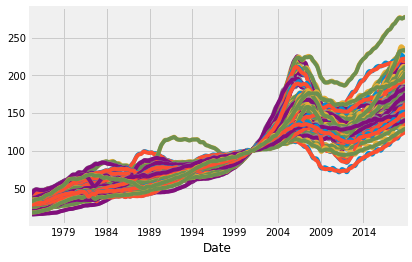

In [27]:
HPI_data.plot()
plt.legend().remove()